### Special shoutout to https://www.kaggle.com/carlolepelaars/efficientnetb5-with-keras-aptos-2019. This code heavily relies on that tutorial.

In [18]:
#imports
import os
import sys
import cv2
import time
import numpy as np
import random as rn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

import tensorflow as tf
from keras.activations import elu
from keras.models import Sequential
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Conv2D, Flatten, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import cohen_kappa_score
from tensorflow.keras.applications import EfficientNetB5

In [19]:
# Path specifications
path = 'N:/Z Project 5/aptos2019-blindness-detection/'
train_df_path = path + "train.csv"
test_df_path = path + 'test.csv'
train_img_path = path + "train_images/"
test_img_path = path + 'test_images/'

# Specify title of our final model
efficientnet_model = 'effnet_modelB5.h5'

# Set seed for reproducability
seed = 7777
rn.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

#train and test dfs
train_df = pd.read_csv(train_df_path)
train_df['id_code'] = train_df['id_code'] + ".png"
test_df = pd.read_csv(test_df_path)
test_df['id_code'] = test_df['id_code'] + ".png"

# Specify image size
IMG_WIDTH = 128
IMG_HEIGHT = 128
CHANNELS = 3

In [20]:
#functions
def get_preds_and_labels(model, generator):
    # Get predictions and labels from the generator
    #:param model: A Keras model object
    #:param generator: A Keras ImageDataGenerator object
    preds = []
    labels = []
    for _ in range(int(np.ceil(generator.samples / BATCH_SIZE))):
        x, y = next(generator)
        preds.append(model.predict(x))
        labels.append(y)
    # Flatten list of numpy arrays
    return np.concatenate(preds).ravel(), np.concatenate(labels).ravel()

class Metrics(Callback):
    #A custom Keras callback for saving the best model according to the Quadratic Weighted Kappa (QWK) metric
    def on_train_begin(self, logs={}):  #Initialize list of QWK scores on validation data
        self.val_kappas = []

    def on_epoch_end(self, epoch, logs={}): #Gets QWK score on the validation data
        # Get predictions and convert to integers
        y_pred, labels = get_preds_and_labels(model, test_generator)
        y_pred = np.rint(y_pred).astype(np.uint8).clip(0, 4)
        _val_kappa = cohen_kappa_score(labels, y_pred, weights='quadratic')
        self.val_kappas.append(_val_kappa)
        print(f"val_kappa: {round(_val_kappa, 4)}")
        if _val_kappa == max(self.val_kappas):
            print("Validation Kappa has improved. Saving model.")
            self.model.save(efficientnet_model)
        return

def preprocess_image(image, sigmaX=10):
    # preprocessing: read in image, resize image to desired size, add Gaussian noise to increase Robustness
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = cv2.addWeighted (image,4, cv2.GaussianBlur(image, (0,0) ,sigmaX), -4, 128)
    return image

# EfficientNet Model

Found 3113 validated image filenames.
Found 549 validated image filenames.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb5 (Functional)  (None, 4, 4, 2048)        28513527  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 10245     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 28,523,778
Trainable params: 28,351,035
Non-trainable params: 172,743
_________________________________________________________________
None
Epoch 1/35
194/194 [==

c:\users\nick\appdata\local\programs\python\python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/35
194/194 [==============================] - 389s 2s/step - loss: 0.5805 - mse: 0.5805 - acc: 0.5334 - val_loss: 0.9452 - val_mse: 0.9452 - val_acc: 0.3051
val_kappa: 0.5968
Validation Kappa has improved. Saving model.


c:\users\nick\appdata\local\programs\python\python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/35
194/194 [==============================] - 385s 2s/step - loss: 0.4993 - mse: 0.4993 - acc: 0.5460 - val_loss: 0.8333 - val_mse: 0.8333 - val_acc: 0.4963
val_kappa: 0.7049
Validation Kappa has improved. Saving model.


c:\users\nick\appdata\local\programs\python\python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/35
194/194 [==============================] - 386s 2s/step - loss: 0.4497 - mse: 0.4497 - acc: 0.5580 - val_loss: 0.5380 - val_mse: 0.5380 - val_acc: 0.5110
val_kappa: 0.805
Validation Kappa has improved. Saving model.


c:\users\nick\appdata\local\programs\python\python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 5/35
194/194 [==============================] - 383s 2s/step - loss: 0.4370 - mse: 0.4370 - acc: 0.5534 - val_loss: 0.7358 - val_mse: 0.7358 - val_acc: 0.4467
val_kappa: 0.7189
Epoch 6/35
194/194 [==============================] - 382s 2s/step - loss: 0.3688 - mse: 0.3688 - acc: 0.5612 - val_loss: 1.1885 - val_mse: 1.1885 - val_acc: 0.3088
val_kappa: 0.4869
Epoch 7/35
194/194 [==============================] - 377s 2s/step - loss: 0.3406 - mse: 0.3406 - acc: 0.5686 - val_loss: 0.7876 - val_mse: 0.7876 - val_acc: 0.5092
val_kappa: 0.6971
Epoch 8/35
194/194 [==============================] - 373s 2s/step - loss: 0.3624 - mse: 0.3624 - acc: 0.5644 - val_loss: 0.8466 - val_mse: 0.8466 - val_acc: 0.4926
val_kappa: 0.6615

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 9/35
194/194 [==============================] - 373s 2s/step - loss: 0.2898 - mse: 0.2898 - acc: 0.5738 - val_loss: 0.8079 - val_mse: 0.8079 - val_acc: 0.5184
val_kappa: 0.6558
Epoc

c:\users\nick\appdata\local\programs\python\python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 11/35
194/194 [==============================] - 371s 2s/step - loss: 0.2737 - mse: 0.2737 - acc: 0.5712 - val_loss: 0.9213 - val_mse: 0.9213 - val_acc: 0.5018
val_kappa: 0.6461
Epoch 12/35
194/194 [==============================] - 370s 2s/step - loss: 0.2658 - mse: 0.2658 - acc: 0.5728 - val_loss: 0.6125 - val_mse: 0.6125 - val_acc: 0.4779
val_kappa: 0.7534
Epoch 13/35
194/194 [==============================] - 368s 2s/step - loss: 0.2629 - mse: 0.2629 - acc: 0.5744 - val_loss: 0.3875 - val_mse: 0.3875 - val_acc: 0.5257
val_kappa: 0.852
Validation Kappa has improved. Saving model.


c:\users\nick\appdata\local\programs\python\python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 14/35
194/194 [==============================] - 369s 2s/step - loss: 0.2575 - mse: 0.2575 - acc: 0.5783 - val_loss: 0.5831 - val_mse: 0.5831 - val_acc: 0.4871
val_kappa: 0.7794
Epoch 15/35
194/194 [==============================] - 372s 2s/step - loss: 0.2603 - mse: 0.2603 - acc: 0.5741 - val_loss: 0.5659 - val_mse: 0.5659 - val_acc: 0.5257
val_kappa: 0.7492
Epoch 16/35
194/194 [==============================] - 380s 2s/step - loss: 0.2438 - mse: 0.2438 - acc: 0.5780 - val_loss: 0.3972 - val_mse: 0.3972 - val_acc: 0.5349
val_kappa: 0.8719
Validation Kappa has improved. Saving model.


c:\users\nick\appdata\local\programs\python\python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 17/35
194/194 [==============================] - 369s 2s/step - loss: 0.2934 - mse: 0.2934 - acc: 0.5731 - val_loss: 1.2027 - val_mse: 1.2027 - val_acc: 0.2886
val_kappa: 0.5698

Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 18/35
194/194 [==============================] - 369s 2s/step - loss: 0.2131 - mse: 0.2131 - acc: 0.5789 - val_loss: 0.4830 - val_mse: 0.4830 - val_acc: 0.4945
val_kappa: 0.8199
Epoch 19/35
194/194 [==============================] - 368s 2s/step - loss: 0.1966 - mse: 0.1966 - acc: 0.5806 - val_loss: 0.2924 - val_mse: 0.2924 - val_acc: 0.5515
val_kappa: 0.8888
Validation Kappa has improved. Saving model.


c:\users\nick\appdata\local\programs\python\python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 20/35
194/194 [==============================] - 368s 2s/step - loss: 0.1849 - mse: 0.1849 - acc: 0.5835 - val_loss: 0.3827 - val_mse: 0.3827 - val_acc: 0.5312
val_kappa: 0.879
Epoch 21/35
194/194 [==============================] - 367s 2s/step - loss: 0.1848 - mse: 0.1848 - acc: 0.5848 - val_loss: 0.5130 - val_mse: 0.5130 - val_acc: 0.5312
val_kappa: 0.8142
Epoch 22/35
194/194 [==============================] - 368s 2s/step - loss: 0.1667 - mse: 0.1667 - acc: 0.5838 - val_loss: 0.4478 - val_mse: 0.4478 - val_acc: 0.5239
val_kappa: 0.8405
Epoch 23/35
194/194 [==============================] - 369s 2s/step - loss: 0.1762 - mse: 0.1762 - acc: 0.5822 - val_loss: 0.3971 - val_mse: 0.3971 - val_acc: 0.5331
val_kappa: 0.8426

Epoch 00023: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 24/35
194/194 [==============================] - 369s 2s/step - loss: 0.1620 - mse: 0.1620 - acc: 0.5822 - val_loss: 0.3523 - val_mse: 0.3523 - val_acc: 0.5368
val_kappa: 0.8731


c:\users\nick\appdata\local\programs\python\python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 27/35
194/194 [==============================] - 369s 2s/step - loss: 0.1291 - mse: 0.1291 - acc: 0.5880 - val_loss: 0.3645 - val_mse: 0.3645 - val_acc: 0.5460
val_kappa: 0.8823

Epoch 00027: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 28/35
194/194 [==============================] - 364s 2s/step - loss: 0.1273 - mse: 0.1273 - acc: 0.5854 - val_loss: 0.3009 - val_mse: 0.3009 - val_acc: 0.5404
val_kappa: 0.8979
Epoch 29/35
194/194 [==============================] - 365s 2s/step - loss: 0.1137 - mse: 0.1137 - acc: 0.5870 - val_loss: 0.3130 - val_mse: 0.3130 - val_acc: 0.5478
val_kappa: 0.8977
Epoch 30/35
194/194 [==============================] - 363s 2s/step - loss: 0.1109 - mse: 0.1109 - acc: 0.5880 - val_loss: 0.2818 - val_mse: 0.2818 - val_acc: 0.5460
val_kappa: 0.9026
Epoch 31/35
194/194 [==============================] - 364s 2s/step - loss: 0.1054 - mse: 0.1054 - acc: 0.5890 - val_loss: 0.2963 - val_mse: 0.2963 - val_acc: 0.5423
val_kappa: 0.8927


c:\users\nick\appdata\local\programs\python\python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00034: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 35/35
194/194 [==============================] - 366s 2s/step - loss: 0.1008 - mse: 0.1008 - acc: 0.5880 - val_loss: 0.2941 - val_mse: 0.2941 - val_acc: 0.5349
val_kappa: 0.8985
The Training QWK is: 0.96626
The Testing QWK is: 0.89586


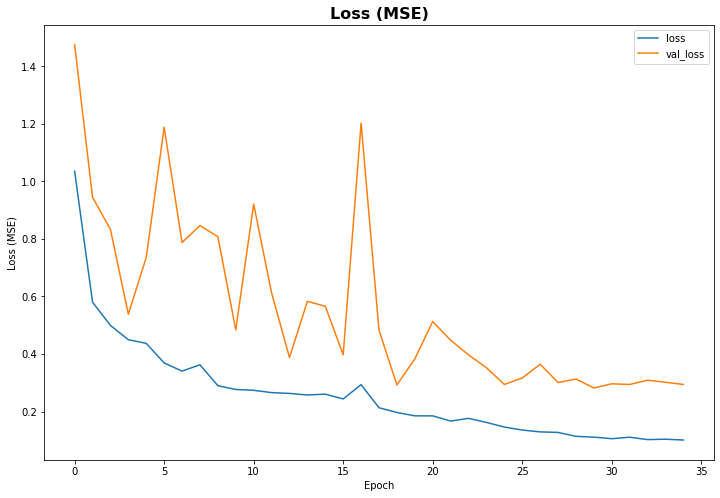

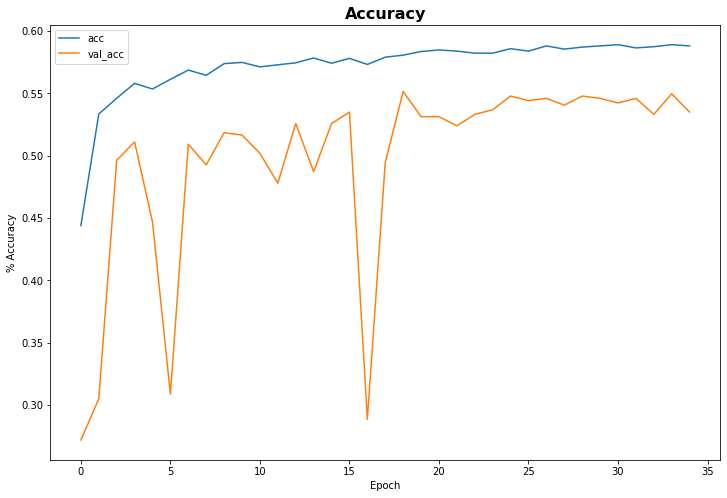

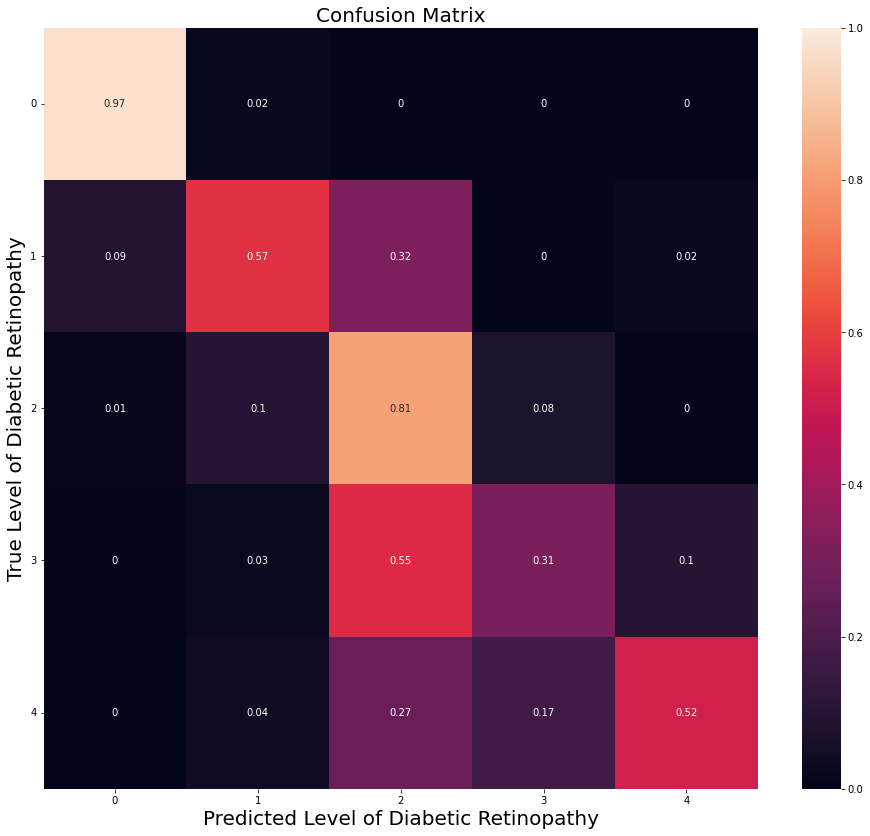

In [17]:
# Smaller batch size to handle large images easily
BATCH_SIZE = 16

# Add Image augmentation to our generator
train_datagen = ImageDataGenerator(rotation_range=360,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split=0.15,
                                   preprocessing_function=preprocess_image, 
                                   rescale=1 / 128.)

# Use the dataframe to define train and validation generators
train_generator = train_datagen.flow_from_dataframe(train_df, 
                                                    x_col='id_code', 
                                                    y_col='diagnosis',
                                                    directory = train_img_path,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='raw', 
                                                    subset='training')

test_generator = train_datagen.flow_from_dataframe(train_df, 
                                                  x_col='id_code', 
                                                  y_col='diagnosis',
                                                  directory = train_img_path,
                                                  target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='raw',
                                                  subset='validation')

# Load in EfficientNetB5
effnet = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, CHANNELS))

def build_model():
    model = Sequential()
    model.add(effnet)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.5))
    model.add(Dense(5, activation=elu))
    model.add(Dense(1, activation="linear"))
    model.compile(loss='mse', optimizer='Adam', metrics=['mse', 'acc'])
    print(model.summary())
    return model

# Initialize model
model = build_model()

# For tracking Quadratic Weighted Kappa score
kappa_metrics = Metrics()
# Monitor MSE to avoid overfitting and save best model
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=12)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1, mode='auto', min_delta=0.0001)

# Begin training
model.fit(train_generator,
         steps_per_epoch=train_generator.samples // BATCH_SIZE,
         epochs=35,
         validation_data=test_generator,
         validation_steps=test_generator.samples // BATCH_SIZE,
         callbacks=[kappa_metrics, es, rlr])

# Load best weights according to MSE
model.load_weights(efficientnet_model)

history_df = pd.DataFrame(model.history.history)
history_df[['loss', 'val_loss']].plot(figsize=(12,8))
plt.title("Loss (MSE)", fontsize=16, weight='bold')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
history_df[['acc', 'val_acc']].plot(figsize=(12,8))
plt.title("Accuracy", fontsize=16, weight='bold')
plt.xlabel("Epoch")
plt.ylabel("% Accuracy");


# Performance and Visualizations

### The visualization code below isn't running on its own for some reason but it was run above and the loss and accuracy charts can be seen in the cell above

In [48]:
# #Visualize mse and accuracy
# history_df = pd.DataFrame(model.history.history)
# history_df[['loss', 'val_loss']].plot(figsize=(12,8))
# plt.title("Loss (MSE)", fontsize=16, weight='bold')
# plt.xlabel("Epoch")
# plt.ylabel("Loss (MSE)")
# history_df[['acc', 'val_acc']].plot(figsize=(12,8))
# plt.title("Accuracy", fontsize=16, weight='bold')
# plt.xlabel("Epoch")
# plt.ylabel("% Accuracy");

**Analysis: There are some very weird dips in both validation loss and accuracy in the 5th and 16th epochs but otherwise tracks pretty well with the training data. It starts to level off at the end so I think 35 is a perfect number of epochs.**

In [21]:
# Calculate QWK on train set
y_train_preds, train_labels = get_preds_and_labels(model, train_generator)
y_train_preds = np.rint(y_train_preds).astype(np.uint8).clip(0, 4)
train_score = cohen_kappa_score(train_labels, y_train_preds, weights="quadratic")

# Calculate QWK on test set
y_test_preds, val_labels = get_preds_and_labels(model, test_generator)
y_test_preds = np.rint(y_test_preds).astype(np.uint8).clip(0, 4)
val_score = cohen_kappa_score(val_labels, y_test_preds, weights="quadratic")

print(f"The Training QWK is: {round(train_score, 5)}")
print(f"The Testing QWK is: {round(val_score, 5)}")

The Training QWK is: 0.96837
The Testing QWK is: 0.89596


**Outstanding testing QWK score of 0.89596! That would put us in 1,297th out of 2800 submitters on Kaggle. That's in the top 50%, I'll take it.**

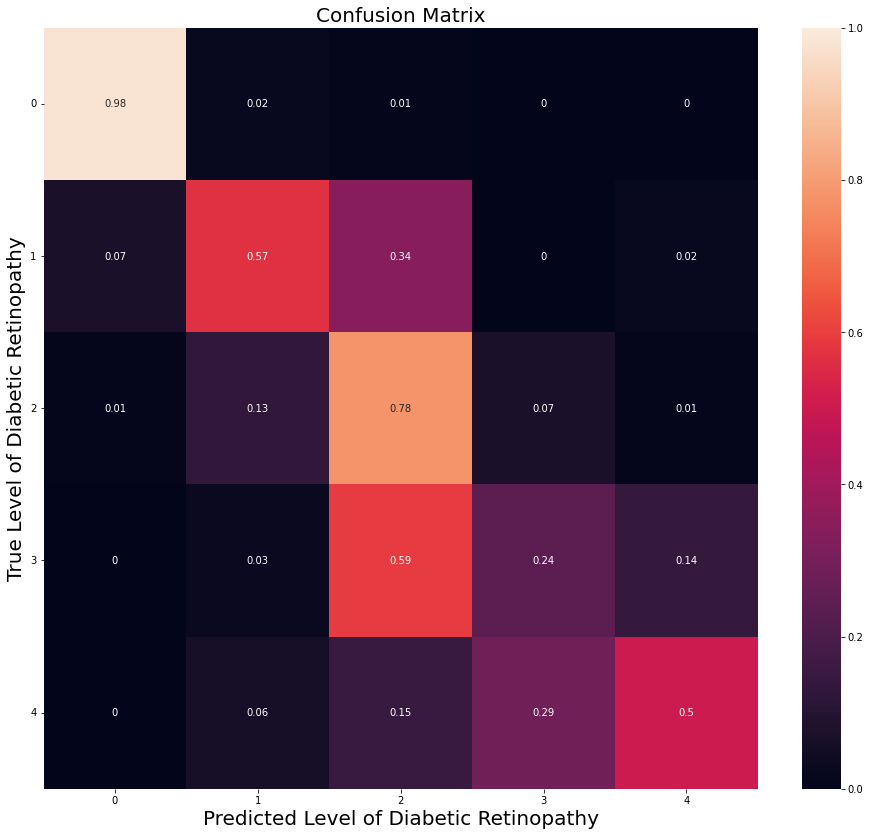

In [22]:
cm = metrics.confusion_matrix(val_labels, y_test_preds)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm = cm.round(2)

fig = plt.figure(figsize=(16, 14))
plt.title('Confusion Matrix', fontsize=20)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', vmin=0, vmax=1);

ax.set_xlabel('Predicted Level of Diabetic Retinopathy', fontsize=20)
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

ax.set_ylabel('True Level of Diabetic Retinopathy', fontsize=20)
plt.yticks(rotation=0)

plt.savefig('ConMatEffNet.png')
plt.show()

**As you can see from the confusion matrix our error is concentrated almost entirely within 1 step of our predicitons. The highest percentage of incorrect predictions more than 2 steps away is the 15 percent number (bottom middle block) where we incorrectly predicted stage 2 diabetic retinopathy in ~7 of 44 actual stage 4s. We didnt have a single other incorrect prediction more than 2 steps over 7 percent. That is the main reason this was our best performing model in regards to QWK** 